# <div align="center">Practical # 4</div>

# Aim: Solve the s-wave Schrodinger equation for the vibration of hydrogen molecule

The $s$-wave Schrodinger equation is given by:

$$
\left[-\frac{\hbar^2}{2 \mu}\frac{d^2}{dr^2} + V\left(r\right)\right]\Psi\left(r\right) = E \Psi\left(r\right)
$$

where, $\mu$ is the reduced mass of the two atom system, $E$ is the energy of the particle, $\Psi(x)$ is the wavefunction of the particle, and $V(r)$ is the **Morse potential**, given by

$$
V(r) = D\left(e^{-2\alpha r^\prime} - e^{-\alpha r^\prime}\right)\quad \text{where,}\quad  r^\prime = r - r_0
$$


Putting, $x  = r/r_0$, $V(x) = D\left(e^{-2\alpha x^\prime} - e^{-\alpha x^\prime}\right)\text{ with } x^\prime = x - 1$ and then multiplying both LHS and RHS of the one dimensional Schrodinger equation by $\frac{-2\mu r_0^2}{\hbar^2}$, we get:

$$
\frac{d^2 \Psi\left(x\right)}{dx^2} + \left[\epsilon - W\left(x\right)\right]\Psi\left(x\right) = 0
$$

where, 

$$
\begin{align}
\epsilon  = \frac{E}{E_0} \text{ with, $E_0 = \frac{\hbar^2}{2\mu r_0^2} = \frac{(\hbar c)^2}{2(\mu c^2) r_0^2}$} (eV), \text{ and } W(x) = \frac{2\mu r_0^2}{\hbar^2} V\left(x\right) = \frac{2\mu c^2 r_0^2}{(\hbar c)^2}\left[D\left(e^{-2\alpha r_
0x^\prime} - e^{-\alpha r_0 x^\prime}\right)\right] = \frac{1}{E_0}\left[D\left(e^{-2\alpha r_0 x^\prime} - e^{-\alpha r_0 x^\prime}\right)\right]
\end{align}
$$

The **parameters** are given as:

$$
\hbar c = 1973\; (eV A),\; D = 0.755501\; (eV),\; \alpha =  1.44,\; r_0 = 0.131349\; (A), \; \mu c^2 = 940\times 10^6\; (eV) 
$$

The above equation is written in terms of dimensionless variables.



## Boundary conditions:

The boundary condition for the wavefunctions of a harmonic oscillator is:

$$
\Psi(0) = 0,\; \Psi(\infty) = 0
$$

## Update equation:

The **update equation** for the above Schrodinger equation according to **Numerov's method** is given by (refer to the notes):

1. **Forward integration**: By forward integration I mean, integration from $-\infty$ to $\infty$

$$
\Psi_{i+1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i-1}f_{i-1}}{f_{i+1}}
$$

Or,

$$
\Psi_{i+2} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i}f_{i}}{f_{i+2}} \quad\left(\text{Putting, $i = i+1$}\right)
$$

where,

$$
f_i = 1 + \frac{h^2}{12}g_i, \quad g_i = \epsilon - \frac{1}{E_0}\left[D\left(e^{-2\alpha x^\prime} - e^{-\alpha x^\prime}\right)\right]
$$

**Note**: Here, $h$ is the **step size** along x-axis and not the **Plank's constant**.

**Notice !**, we need $\Psi_{i+1}$ and $\Psi_{i}$ in order to evaluate, $\Psi_{i+2}$. Therefore, for the first iteration, i.e., $i = 0$, we will need to supply, $\Psi_{1}$ and $\Psi_{0}$ to evaluate, $\Psi_{2}$. The value of  $\Psi_{0}$ is nothing but the value of $\Psi(-\infty)$ which is zero according to the boundary condition. The value of $\Psi_{1}$ can be choosen arbitarily, we choose some small value say, $\Psi_1 = d\Psi = 0.01$.

2. **backward integration**: Backward integration simply mean integrating from $\infty$ to $-\infty$. For this we rewrite the update equation as:

$$
\begin{align}
&\Psi_{i-1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i+1}f_{i+1}}{f_{i-1}}\\
%
\implies &\Psi_{i} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i+2}f_{i+2}}{f_{i}}\quad\left(\text{Putting, $i = i+1$}\right)\\
\end{align}
$$


## Normalization condition:

Let the normalization factor be $N$ such that, $N\Psi(r)$ is normalized, i.e.,
$$
\begin{align}
&\int_0^\infty N^2|\Psi(x)|^2 dx = 1\\
\implies & N = \sqrt{\frac{1}{\int_{-\infty}^\infty|\Psi(x)|^2 dx}}
\end{align}
$$

## Shooting algorithm

**Shooting algorithm:** The algorithm to find the energy eigen values is sometimes known as the shooting algorithm.

To find the Energy **Eigen values** we will utilize the boundary conditions:
$$
\begin{equation}
\Psi(\pm\infty) = 0
\end{equation}
$$

This boundary condition can be implemented by choosing, some large, $x = x_c$ (say) such that, $\Psi(\pm x_c) = 0$. 

Lets say, $E_1$ corresponds to a correct energy level, then when we **backward/forward integrate** the one dimensional schrodinger equation derived earlier using **Numerov’s method**, we should get $\Psi(\pm\infty) = 0$. A deviation of the energy from $E_1$ will result in $\Psi(\pm \infty) \ne 0$. The basic procedure to search for correct Energy Eigen value aka **shooting algorithm** is as follows:

Start wite a guess energy, 
1) The guess energy, $E_1$ should be smaller than the actual energy. For example, if we are searching for the energy eigen value of the ground state which is $\epsilon = 1$. Then our guess energy should be smaller than 1.<br>
2) With the guess energy forward integrate the equation and get the value of the wavefunction at $x = \infty$, which we will denote as $\Psi_1$. Meanwhile, Set another energy, $E_2 = E_1$.<br>
3) Increase the energy $E_2$ by an amount $\delta E$ and get a new energy, $E_2 = E_2 + \delta E$. <br>
4) Integrate the Scrodinger equation to get the corresponding wavefunction, $\Psi_2$ and evaluate $\Psi_2(\infty)$. <br>
5) Go back to step 2 untill we get $\Psi_1(\infty)\times \Psi_2(\infty) <0$. <br>
6) At this step, we should have the correct energy enclosed in the interval, $[E_1, E_2]$. Use root finding method, e.g. **scipy.optimize.brentq** to get the correct energy.

# <div align="center">Code</div>

# Common libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Uncommon libraries used

## 1) *scipy.integrate.simps()*: 

**Syntax** : scipy.integrate.simps(y, x)<br>
**Return** : Returns the integrated value of y(x) using **Simpsion's** rule method.<br>

Example: 

x = **numpy**.arange(0, 10)<br>
y = **numpy**.sqrt(x)<br>
integration = **scipy.integrate.simps**(y, x)

## 2) *scipy.optimize.brentq*
Uses the classic **Brent’s method** to find a root of the function $f(x)$ on the sign changing interval $x\in[a , b]$. Check [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) for the syntax. For details on Brent's method check [this](https://nickcdryan.com/2017/09/13/root-finding-algorithms-in-python-line-search-bisection-secant-newton-raphson-boydens-inverse-quadratic-interpolation-brents/). Recall that we had algorithms such as *Line Search*, *Bisection*, *Secant*, *Newton-Raphson*, *Inverse Quadratic Interpolation*; *Brent’s Method* is just one of such methods for finding the root of a function in the sign changing interval $x\in[a,b]$. By "**root** of a function", $f(x)$ I mean the value of $x$ where $f(x) = 0$.

In [6]:
from scipy.integrate import simps
from scipy.optimize import brentq

# <div align="center">Function definitions</div>

We define three functions:

## 1) eigen_function_at_zero(E, x): 

it takes dimensionless energy, E and a vector x and returns the value of the eigen function corresponding to dimensionless energy, epsilon at $x = 0$

## 2) eigen_function(E, x):

it takes dimensionless energy, E and a vector x and returns a vector containing the value of the  corresponding wavefunction at all x.

## 3) eigen_values(E_guess, n):

It takes a guess dimensionless eigen energy, E_guess and returns a vector containing the first $n$ eigen values.

In [37]:
###############################################################
#                  eigen_function_at_zero()
###############################################################

def eigen_function_at_zero(epsilon, x):

    global h, D, alpha, E_0

    y = np.zeros(x.size)
    
    x_prime = x - 1

    # Boundary condition
    y[-1] = 0.0
    
    # Initialization
    y[-2] = 0.01


    # Numerov's algorithm

    g  = epsilon - (1/E_0)*D*(np.exp(-2*alpha*r_0*x_prime) - np.exp(-alpha*r_0*x_prime))
    f  = 1.0 + (h**2/12)*g

    for i in range(g.size - 3, -1, -1):
        y[i] = (12 - 10*f[i+1]) * y[i+1] - y[i+2] * f[i+2]
        y[i] /= f[i]

    # normalization

    y /= np.sqrt(simps(np.abs(y)**2, x))

    # now extrapolate the wavefunction to u(0)
    # the first derivative equals at ur[0]
    # (u0 - ur[0]) / (0 - r0[0]) = (ur[1] - ur[0]) / (r0[1] - r0[0])
    # y0 = y[0] + (y[1] - y[0]) * (0 - x[0]) / dx

    y0 = y[0]
    
    return y0


###############################################################
#                  eigen_function()
###############################################################

def eigen_function(epsilon, x):

    global h, D, alpha, E_0

    y = np.zeros(x.size)
    x_prime = x - 1
    
    # Boundary condition
    y[-1] = 0.0
    
    # Initialization
    y[-2] = 0.01

    
    # Numerov's algorithm

    g  = epsilon - (1/E_0)*D*(np.exp(-2*alpha*r_0*x_prime) - np.exp(-alpha*r_0*x_prime))
    f  = 1.0 + (h**2/12)*g

    for i in range(g.size - 3, -1, -1):
        y[i] = (12 - 10*f[i+1]) * y[i+1] - y[i+2] * f[i+2]
        y[i] /= f[i]

    # normalization

    y /= np.sqrt(simps(np.abs(y)**2, x))
    
    return y


###############################################################
#                  eigen_function()
###############################################################

def eigen_values(E_guess, x, n):

    E = np.zeros(n)
    
    E_2 = E_1 = E_guess
    
    # step size for energy
    dE      = 0.01 

    for i in range(n):
        # wavefunction at x = infinity corresponding to the guess energy
        y1      = eigen_function_at_zero(E_1,x)
        
        while True:
            E_2 += dE
            y2 = eigen_function_at_zero(E_2, x)
            
            if y1 * y2 < 0:
                break

        E[i] = brentq(eigen_function_at_zero, E_1, E_2, args=(x))

        E_1 = E_2 = E[i] + dE
    
    return E

# <div align="center">Main code starts from here</div>

# Global parameters

In [38]:
hbar  = 1973
m     = 940e6
D     = 0.755501
alpha = 1.44
r_0   = 0.131349
E_0   = hbar**2/(2*m*r_0**2)

# Print the value of first 3 Eigen states and evaluate the corresponding Eigen functions

In [40]:
# Global variables
x       = np.linspace(1E-6, 50, 1000)
x_prime = x - 1

# Morse potential
V       = (1/E_0)*D*(np.exp(-2*alpha*r_0*x_prime) - np.exp(-alpha*r_0*x_prime))

Psi       = np.zeros((x.size, 3))

# Global parameters
h   = x[1] - x[0]         # step size


E_guess = min(V)          # Guess energy for ground state is the minimum potential energy

Epsilon   = eigen_values(E_guess, x, 3)


for i in range(3):
    Psi[:,i] = eigen_function(Epsilon[i], x) 
    print ('Energy of state, %d is E_%d = %5.3f (eV)' % (i+1,i+1, Epsilon[i]*E_0))

Energy of state, 1 is E_1 = -0.161 (eV)
Energy of state, 2 is E_2 = -0.113 (eV)
Energy of state, 3 is E_3 = -0.073 (eV)


# Plot the ground state wavefunction along with the anharmonic potential for different values of $b$

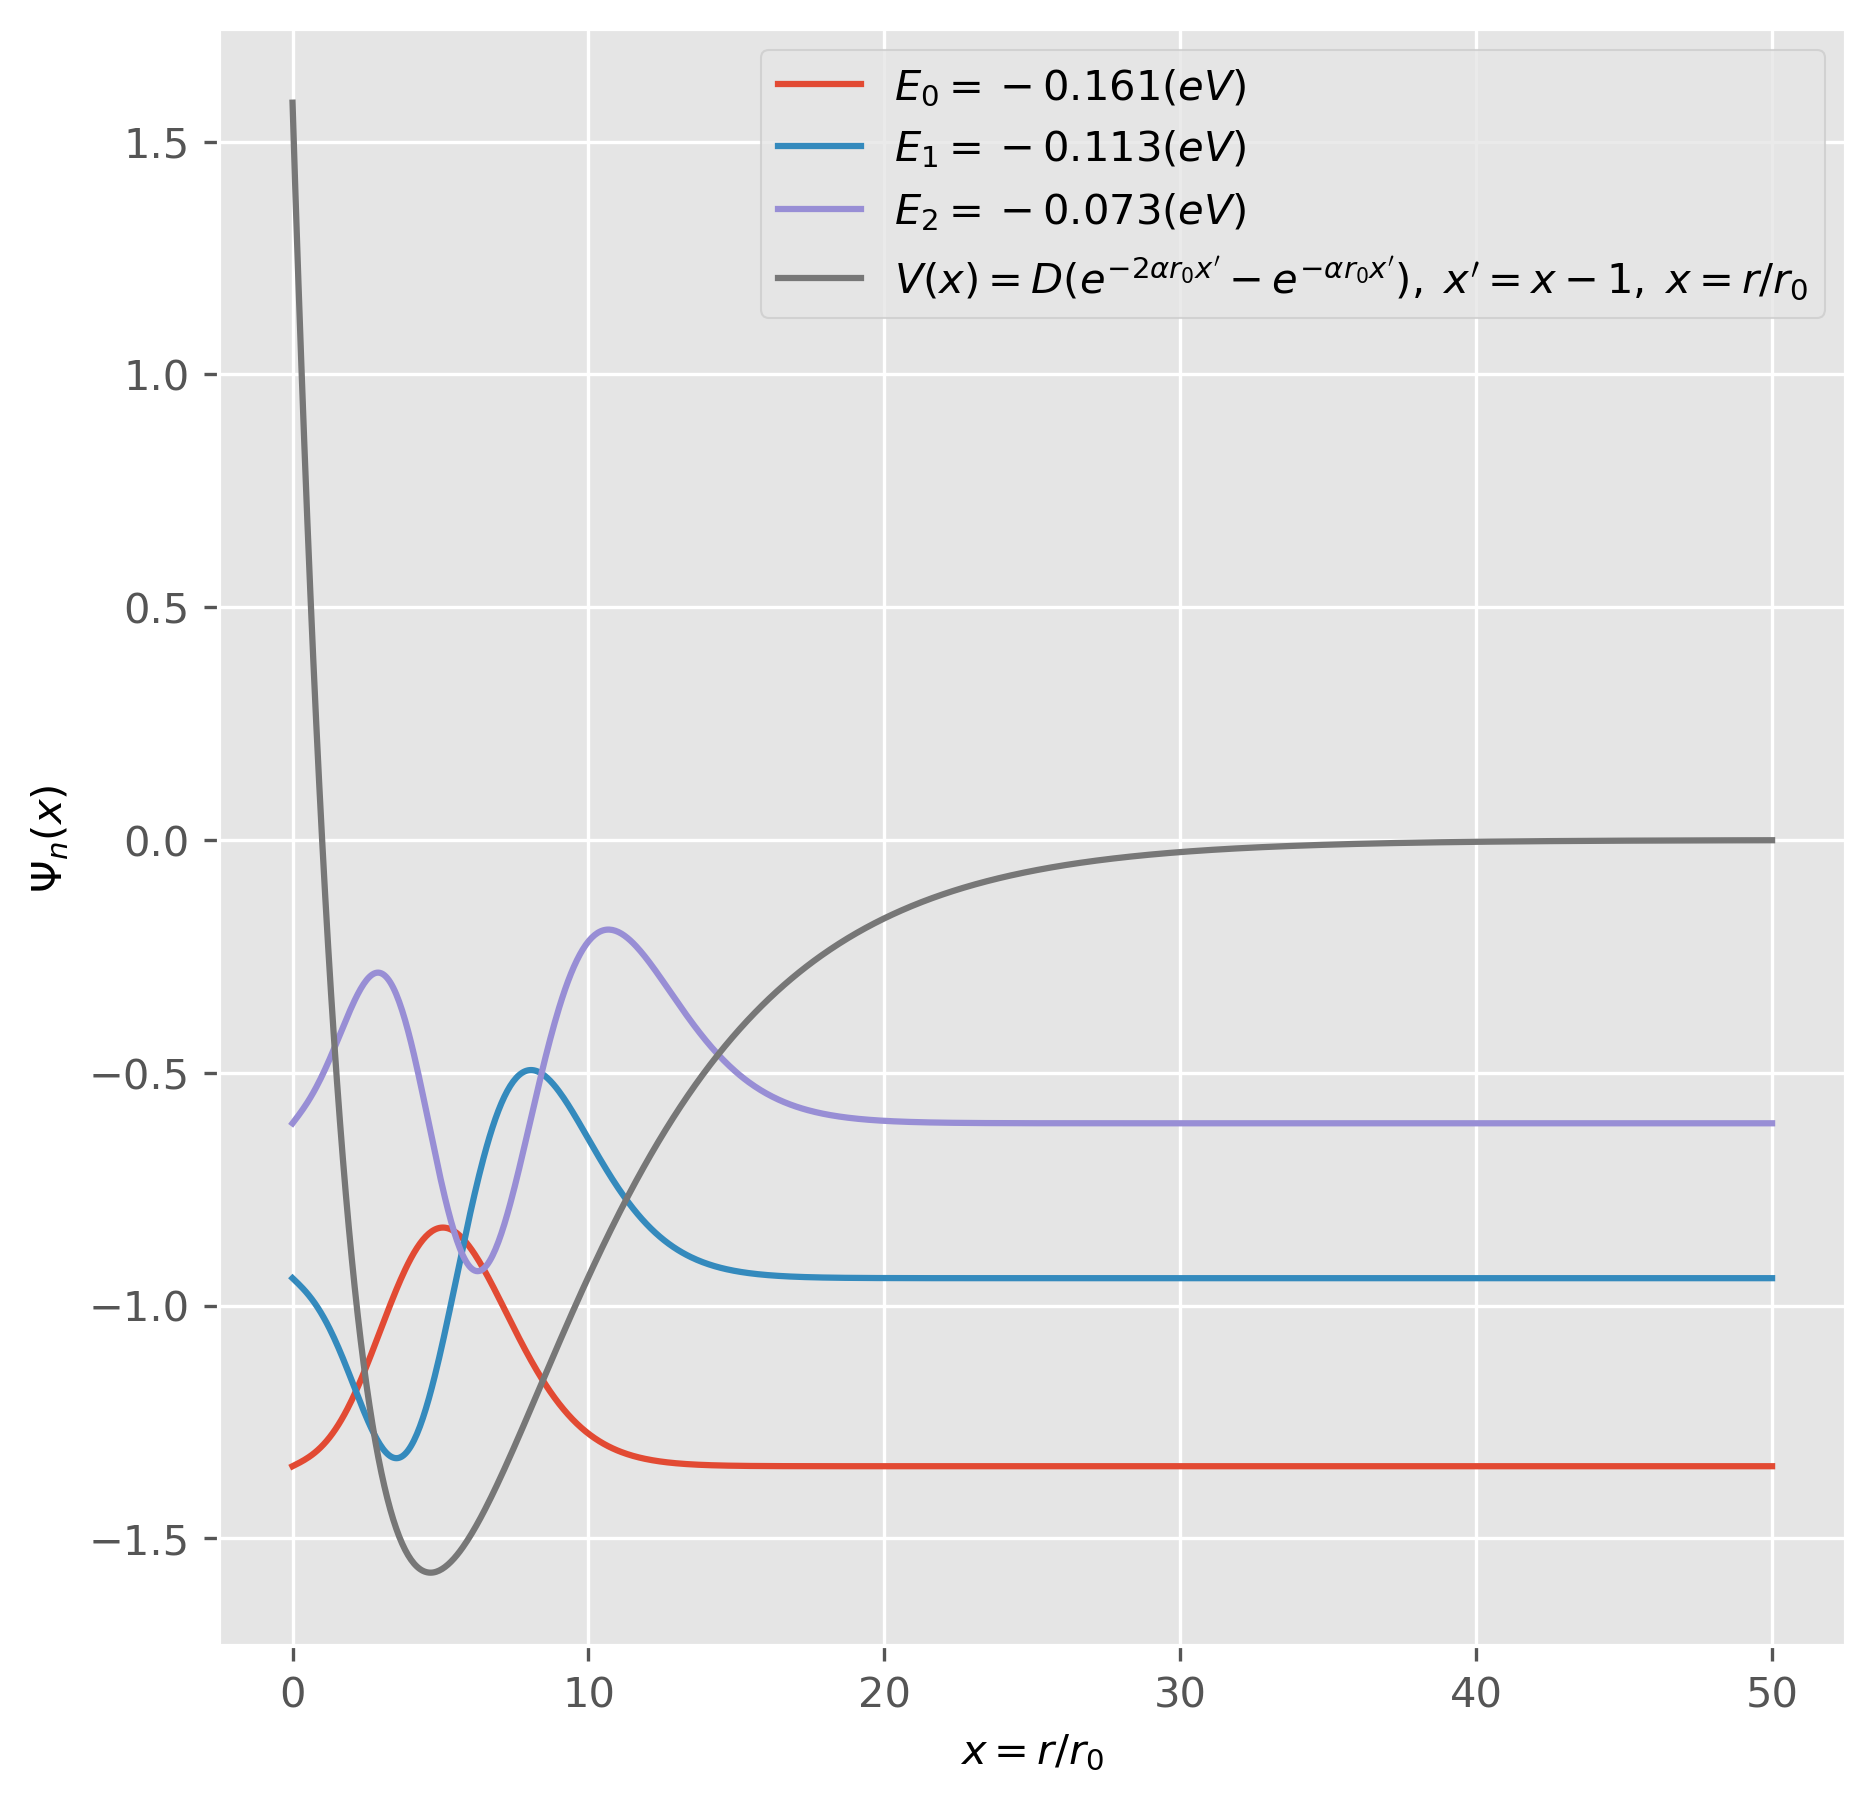

In [42]:
# plot style
plt.style.use('ggplot')

# figure size
plt.figure(figsize=(7,7), dpi = 300)

# plot the first six wavefunctions
for i in range(Epsilon.size):
    plt. plot(x,Psi[:,i] + Epsilon[i], label=r'$E_%d = %5.3f (eV) $' % (i, Epsilon[i]*E_0))

# plot the linear harmonic oscillator potential
plt. plot(x,V, label=r'$V(x) = D\left(e^{-2\alpha r_0 x^\prime} - e^{-\alpha r_0 x^\prime}\right),\; x^\prime = x - 1,\; x = r/r_0$')    

# y axis ticks
#plt.yticks(np.arange(min(Epsilon), max(Epsilon), Epsilon[2]- Epsilon[1]))

# y axis range
#plt.ylim([-8, 15])

# legends
plt.legend(loc ='best')
#plt.legend([r'$\epsilon_0 = 1 $', r'$\epsilon_1 = 3$', r'$\epsilon_2 = 5$', r'$\epsilon_3 = 7$', r'$\epsilon_4 = 9$', r'$\epsilon_5 = 11$'], loc ="upper right" )

# axis labels
plt.ylabel(r'$\Psi_n(x)$')
plt.xlabel(r'$x = r/r_0$')

# save the plot to file named 'plot.png'
plt.savefig('wavefunctions.png')

# Display the plot in this notebook
plt.show()